In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)
n_samples = 300

annual_income = np.random.normal(45000, 15000, n_samples).astype(dtype=np.int32)
spending_score = np.random.normal(50, 25, n_samples).astype(dtype=np.int32)
age = np.random.normal(35, 12, n_samples).astype(dtype=np.uint8)

data = pd.DataFrame({
    'Annual_Income': annual_income,
    'Spending_Score': spending_score,
    'Age': age
})

print(data.head())
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled

   Annual_Income  Spending_Score  Age
0          52450              29   44
1          42926              35   23
2          54715              68   45
3          67845              65   51
4          41487              49   39


,Annual_Income,Spending_Score,Age
0,0.511170,-0.835966,0.711816
1,-0.135040,-0.584925,-1.044722
2,0.664851,0.795800,0.795461
3,1.555730,0.670279,1.297329
4,-0.232677,0.000837,0.293593
...,...,...,...
295,-0.699557,-0.501245,0.544527
296,0.921191,-0.250204,-0.291920
297,0.318406,-1.003327,0.042659
298,0.832917,-0.459405,1.130040


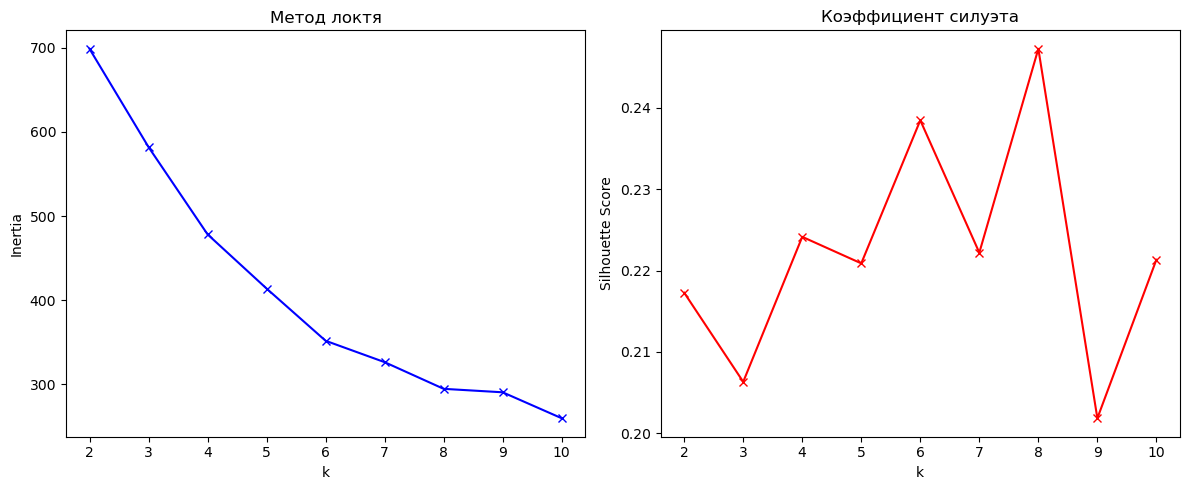

In [4]:
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Метод локтя')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

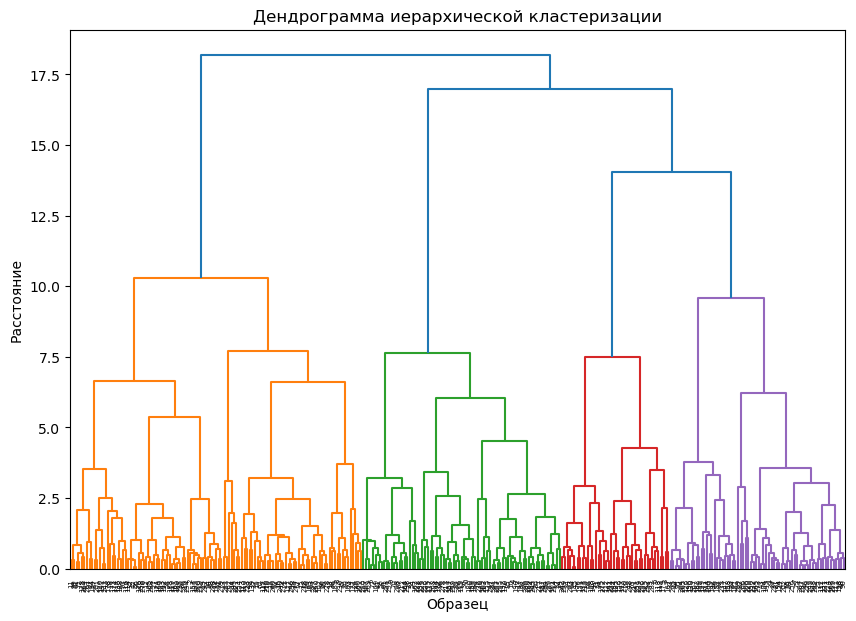

In [5]:
linkage_matrix = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Образец')
plt.ylabel('Расстояние')
plt.show()

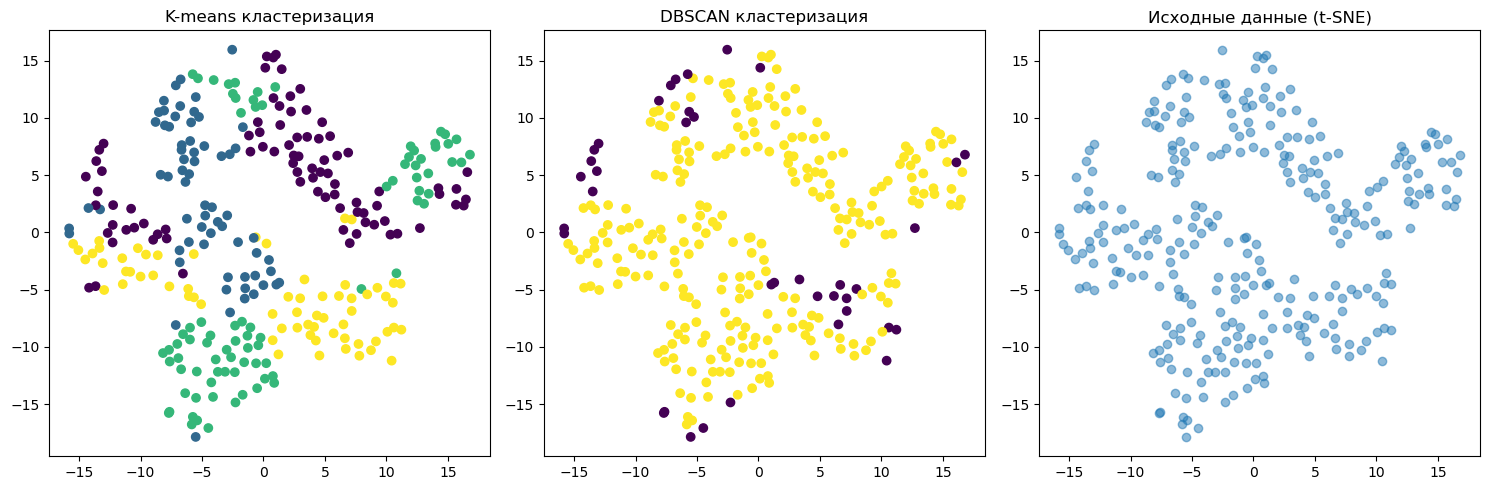

In [9]:
dbscan = DBSCAN(eps=0.7, min_samples=4)
dbscan_labels = dbscan.fit_predict(data_scaled)

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

plt.figure(figsize=(15, 5))

# K-means
plt.subplot(1, 3, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means кластеризация')

# DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN кластеризация')

# Исходные даннык
plt.subplot(1, 3, 3)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)
plt.title('Исходные данные (t-SNE)')

plt.tight_layout()
plt.show()

In [7]:
print("\nРезультаты анализа:")
print(f"Оптимальное количество кластеров (K-means): {optimal_k}")
print(f"Количество кластеров DBSCAN: {len(np.unique(dbscan_labels))}")
print(f"Коэффициент силуэта для K-means: {silhouette_scores[optimal_k-2]:.3f}")


Результаты анализа:
Оптимальное количество кластеров (K-means): 4
Количество кластеров DBSCAN: 7
Коэффициент силуэта для K-means: 0.224
